In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

In [2]:
f = lambda x: x**3 - 2*x**2+2

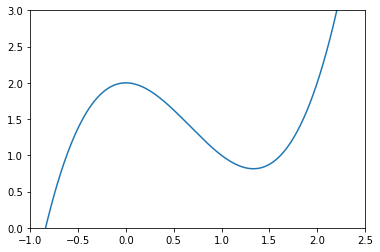

In [3]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

In [4]:

x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3334253508453249
Number of steps: 17


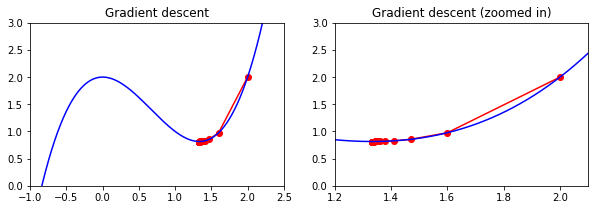

In [5]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [6]:
# we setup this function to pass into the fmin algorithm
def f2(n,x,s):
    x = x + n*s
    return f(x)

x_old = 0
x_new = 2 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function to find ideal step size.
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print("Local minimum occurs at ", float(x_new))
print("Number of steps:", len(x_list))

Local minimum occurs at  1.3333333284505209
Number of steps: 4


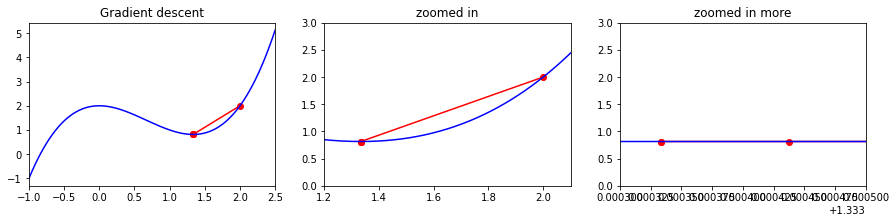

In [7]:
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("zoomed in")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()